In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('car.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [6]:
df.isnull().mean()*100

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df1=df.drop(columns='Car_Name',axis=1)

In [9]:
df2=df1.copy()

In [10]:
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
df2['Number_of_yrs']=2020-df['Year']

In [12]:
df2.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_yrs
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [13]:
 df2.drop(['Year'],axis=1,inplace=True)

In [14]:
df2.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_yrs
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [15]:
print(df2['Seller_Type'].unique())
print(df2['Fuel_Type'].unique())
print(df2['Transmission'].unique())
print(df2['Owner'].unique())


['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [16]:
import matplotlib.pyplot as plt
df2['Seller_Type'].value_counts().plot(kind='bar')

In [17]:
from feature_engine.categorical_encoders import MeanCategoricalEncoder
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    df2[['Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Number_of_yrs']],  # predictors
    df2['Selling_Price'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((210, 7), (91, 7))

In [19]:
mean_enc = MeanCategoricalEncoder()

In [20]:
mean_enc.fit(X_train, y_train)

MeanCategoricalEncoder(variables=['Fuel_Type', 'Seller_Type', 'Transmission'])

In [21]:
mean_enc.encoder_dict_

{'Fuel_Type': {'CNG': 3.1,
  'Diesel': 10.27102564102564,
  'Petrol': 3.1340236686390526},
 'Seller_Type': {'Dealer': 6.532857142857145,
  'Individual': 0.8772727272727274},
 'Transmission': {'Automatic': 8.323076923076922,
  'Manual': 3.9131521739130446}}

In [22]:
mean_enc.variables

['Fuel_Type', 'Seller_Type', 'Transmission']

In [23]:
X_train = mean_enc.transform(X_train)
X_test = mean_enc.transform(X_test)

# let's explore the result
X_train.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_yrs
222,7.60,77632,10.271026,6.532857,3.913152,0,6
283,11.80,9010,3.134024,6.532857,3.913152,0,4
44,2.69,50000,3.134024,6.532857,3.913152,0,8
245,9.40,71000,10.271026,6.532857,3.913152,0,8
191,0.57,25000,3.134024,0.877273,3.913152,1,8


In [25]:
df3=X_train.copy()

In [38]:
df4=y_train.copy()
df4=pd.DataFrame(df4)

In [39]:
df3.shape

(210, 7)

In [40]:
df4.shape

(210, 1)

In [46]:
mergedDf = df4.merge(df3, left_index=True, right_index=True)

In [52]:
corr1=mergedDf.corr()

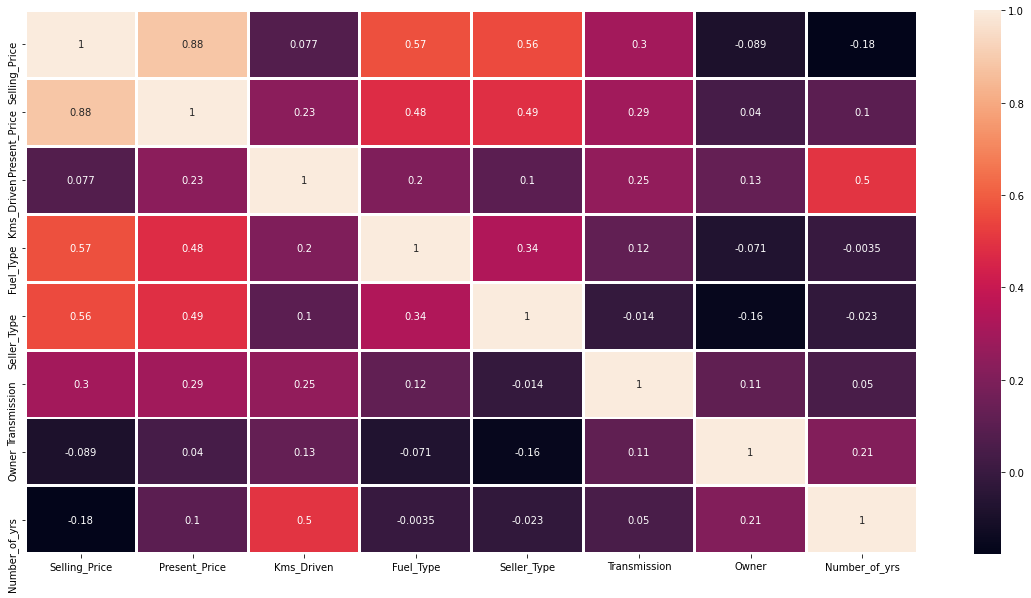

In [64]:
import seaborn as sns
fig=plt.figure(figsize=(20,10))
sns.heatmap(corr1,annot=True,linewidths=2)
plt.show()

In [76]:
X_train.corr()


,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_yrs
Present_Price,1.000000,0.234312,0.478134,0.485836,0.292885,0.039800,0.103538
Kms_Driven,0.234312,1.000000,0.204041,0.099943,0.251951,0.130161,0.500100
Fuel_Type,0.478134,0.204041,1.000000,0.337855,0.117947,-0.071220,-0.003475
Seller_Type,0.485836,0.099943,0.337855,1.000000,-0.014001,-0.157359,-0.022875
Transmission,0.292885,0.251951,0.117947,-0.014001,1.000000,0.113769,0.049780
Owner,0.039800,0.130161,-0.071220,-0.157359,0.113769,1.000000,0.211653
Number_of_yrs,0.103538,0.500100,-0.003475,-0.022875,0.049780,0.211653,1.000000


In [78]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X_train,y_train)

ExtraTreesRegressor()

In [79]:
print(model.feature_importances_)

[0.40516458 0.02967341 0.2493119  0.14519384 0.10665521 0.00081845
 0.06318261]


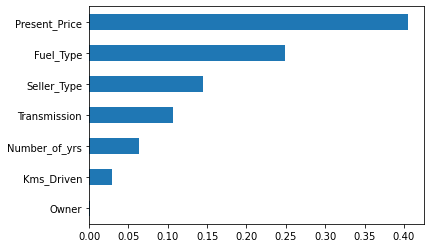

In [82]:
fe=pd.Series(model.feature_importances_,index=X_train.columns)
fe.sort_values().plot(kind='barh')
plt.show()

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
lm = LinearRegression()

In [85]:
lm.fit(X_train,y_train)

LinearRegression()

In [87]:
coeff_df = pd.DataFrame(lm.coef_,X_train.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Present_Price,0.398668
Kms_Driven,-0.000006
Fuel_Type,0.283407
Seller_Type,0.241315
Transmission,0.302284
Owner,-0.824669
Number_of_yrs,-0.366216


In [88]:
predictions = lm.predict(X_test)

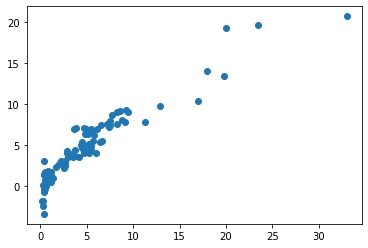

In [89]:
plt.scatter(y_test,predictions)

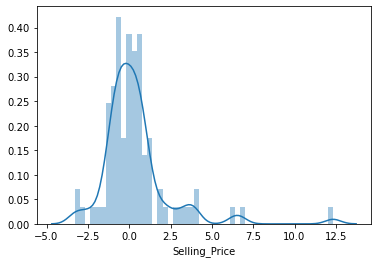

In [90]:
sns.distplot((y_test-predictions),bins=50);

In [96]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 1.2427102402177435
MSE: 4.4306175109611
RMSE: 2.104903207029031


In [102]:
r2=metrics.r2_score(y_test,predictions)
r2

0.8518488226581518

In [99]:
X_test.shape

(91, 7)

In [100]:
Adj_r2 = 1-(1-r2)*(91-1)/(91-7-1)

In [101]:
Adj_r2

0.8393541450510079

In [103]:
import pickle

In [104]:
filename='final_model.pickle'
pickle.dump(lm,open(filename,'wb'))